# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [1]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample


In [2]:
# Leitura do arquivo
df = pd.read_csv("Mall_Customers.csv", delimiter=',')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Verificacação de valores Nulos ou vazios
df.describe(include='all')
# verificação de valores vaziu ou nulo
total_nulos = df.isnull().sum().sum()
total_vazios = (df == '').sum().sum()

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de campos vazios: {total_vazios}")

Total de valores nulos: 0
Total de campos vazios: 0


In [4]:
# Drop da columa CustomerID pois não vamos precisar dela

df = df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [7]:
df['Gender'].unique()

array([1, 0])

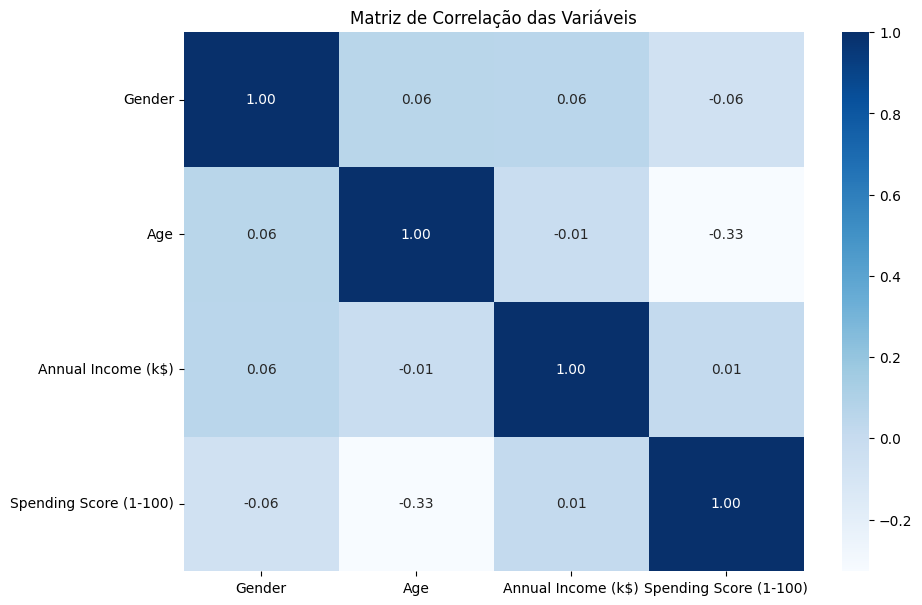

In [8]:
cols = [
    'Gender',                  # gênero
    'Age',                     # idade
    'Annual Income (k$)',      # Salario anuel em milhares
    'Spending Score (1-100)'   # Pontuação atribuída pelo shopping
]

df_corr = df[cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis")
plt.show()

Podemos verificar na matriz de correlação não temos muitas correlação muitos forte e fracas, uma em espcial a Idade com o Score do shopping que é de -0.33 uma relação negativa fraca

In [13]:
# Realizar padronização dos dados para lidar com a variancia entre income e score

scaler = StandardScaler()

# Ajustar e transformar mantendo formato de DataFrame
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns,     # mantém os nomes das colunas
    index=df.index          # mantém os índices
)

df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [15]:
# Definindo o modelo
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustando o modelo aos dados escalados
kmeans.fit(X_scaled)

# Obtendo os rótulos dos clusters
clusters = kmeans.labels_

# Adicionando ao dataframe original
df["Cluster"] = clusters

In [16]:
# verificando os cluester criados
df.groupby("Cluster").mean(numeric_only=True)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.394366,52.169014,46.676056,39.295775
1,0.628571,40.228571,91.342857,20.628571
2,0.404255,28.276596,59.585106,69.446809


In [17]:
# Verificação de quantidades de pessoas em cada cluster
df['Cluster'].value_counts()

,count
Cluster,
2,94
0,71
1,35


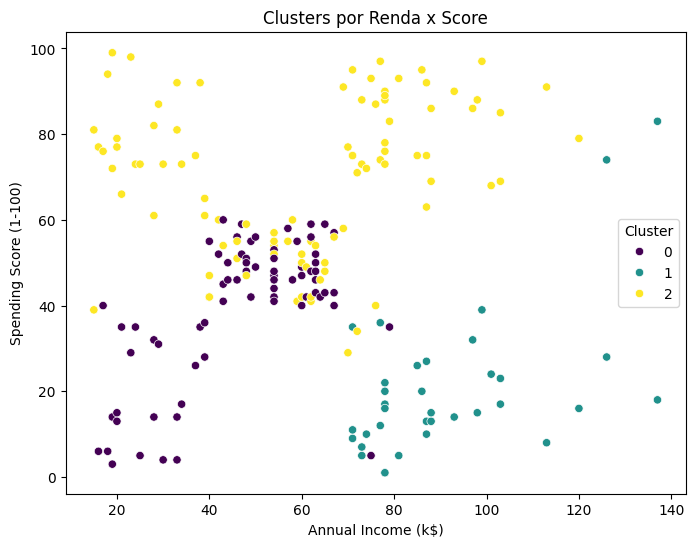

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis'
)
plt.title("Clusters por Renda x Score")
plt.show()


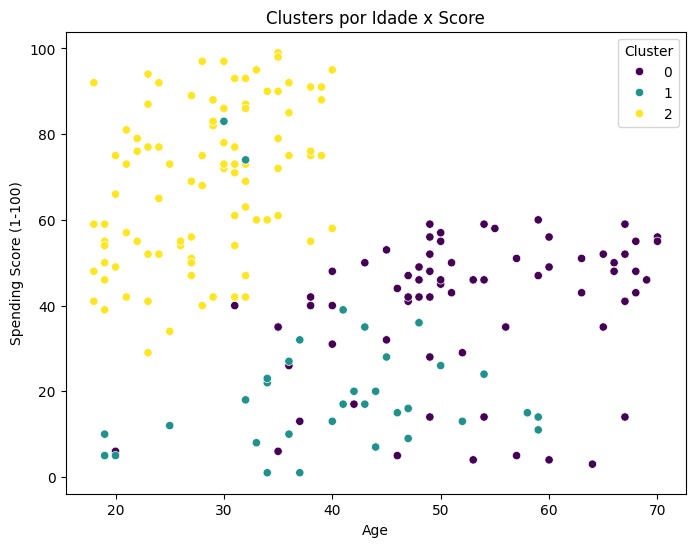

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis'
)
plt.title("Clusters por Idade x Score")
plt.show()

Cluster 0:
Idade: 52 anos (o grupo mais velho)
Renda anual: 47k (renda moderada)
Spending Score: 39 (gasto moderado)
Gender : 0.39 → maioria feminina leve
clientes que podem ser fidelizados com promoções específicas

Cluster 1:
Idade: 40 anos
Renda anual: 91k (a maior renda entre os clusters)
Spending Score: 20 (o mais baixo de todos)
Gender : 0.62 → maioria masculina
cliente que são fortes candidados para Marketing especificas.

Cluster 2:
Idade: 28 anos (o grupo mais jovem)
Renda anual: 60k
Spending Score: 69 (o mais alto)
Gender : 0.40 → mais feminino
Clientes premium para usar promoçoes deirecionadas por possuim poder de comprar maior.

